![img](https://raw.githubusercontent.com/SalAlba/machine-learning/master/data/images/work-in-progress.png)

<!-- <figure>
    <img src="https://raw.githubusercontent.com/SalAlba/machine-learning/master/data/images/work-in-progress.png" width="300" height="300"/>
</figure> -->

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# import seaborn as sns
# sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

import imblearn



In [2]:
# Paths ...
PROJECT_ROOT_DIR = os.getcwd()
PATH_TO_DATA = '../../data'  # TODO make cross

# Imbalanced datasets


## Table of content
1. [What is imbalanced dataset](#imbalanced-dataset)
    1. [How Know if data not balanced](#)
    2. [Side effects](#)
    3. [Can we learn from imbalanced data](#)
    4. [What to do ?](#)
2. [Oversampling](#oversampling)
    1. [solutions](#)
    2. [limitations](#)
3. [Undersampling](#undersampling)
    1. [solutions](#)
    2. [limitations](#)
4. [Combine Oversampling and Undersampling](#)
5. [In practice](#in-practice)
6. [Summary](#summary)
7. [What Next ?](#what-next)
8. [Resources](#resources)

## Imbalanced dataset
<a id="imbalanced-dataset"></a>

**Imbalanced dataset** when number of samples which belong to one class dominate the whole dataset.

> " A dataset is imbalanced if at least one of the classes constitutes only a very small minority. " [[3.3.]](#resources)

<!-- ![img](./images/imbalanced-data.png) -->
<figure>
    <figcaption>img. src [4.1.]</figcaption>
    <img src="./images/imbalanced-data.png" width="400" height="400" />
</figure>


1. Does imbalanced dataset appear just in binary dataset? No.
2. Does imbalanced dataset appear in multi label dataset? Yes.

> Imbalanced data prevail in banking, insurance, engineering, and many other fields. It is common in fraud detection that the imbalance is on the order of 100 to 1.

### How Know if data not balanced
1. count number of samples in every class.
2. make bar plot where the length encode number of samples per class.
3. make scatter plot of data, select two features from dataset color of every sample represent to which class belong.
4. ...

### Side effects
Imbalanced dataset can cause bad side effects on ML algo. like neural networks, SVM etc.

1. ML will ignore the minority class entirely.
2. When we split data into train/test could be a big chance to ignore the minority class samples in training data.
3. ...


The learning phase and the subsequent prediction of machine learning algorithms can be affected by the problem of imbalanced data set. The balancing issue corresponds to the difference of the number of samples in the different classes. We illustrate the effect of training a linear SVM classifier with different level of class balancing.[[3.2.]](#resources)

<figure>
    <figcaption>img. src [4.2.]</figcaption>
    <img src="./images/sphx_glr_plot_comparison_over_sampling_0011.png"/>
</figure>




### Can we learn from imbalanced data
> TODO ...

### What to do ?
1. Undersampling.
2. Oversampling.
3. Combination of over-under sampling.
4. ...

**Oversampling and undersampling** a set of techniques used to adjust the ratio of samples in dataset. [[3.1.]](#resources)

> [Imbalanced learn](https://imbalanced-learn.readthedocs.io/en/stable/index.html)

> TODO ...

<figure>
    <figcaption>img. src [4.3.]</figcaption>
    <img src="./images/oversampling-undersampling.png"/>
</figure>


In [8]:
# Make imbalanced dataset
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    flip_y=0,
    random_state=1
)

idx0 = np.where(y == 0)[0]
idx1 = np.where(y == 1)[0]

# Make imbalanced data frame
df = pd.DataFrame({
    'f1': X[:,0],
    'f2': X[:,1],
    'y': y,
})

df.head(5)

,f1,f2,y
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0


In [193]:
df.y.value_counts()

0    9900
1     100
Name: y, dtype: int64

In [4]:
df.groupby('y').count()

,f1,f2
y,,
0,9900,9900
1,100,100


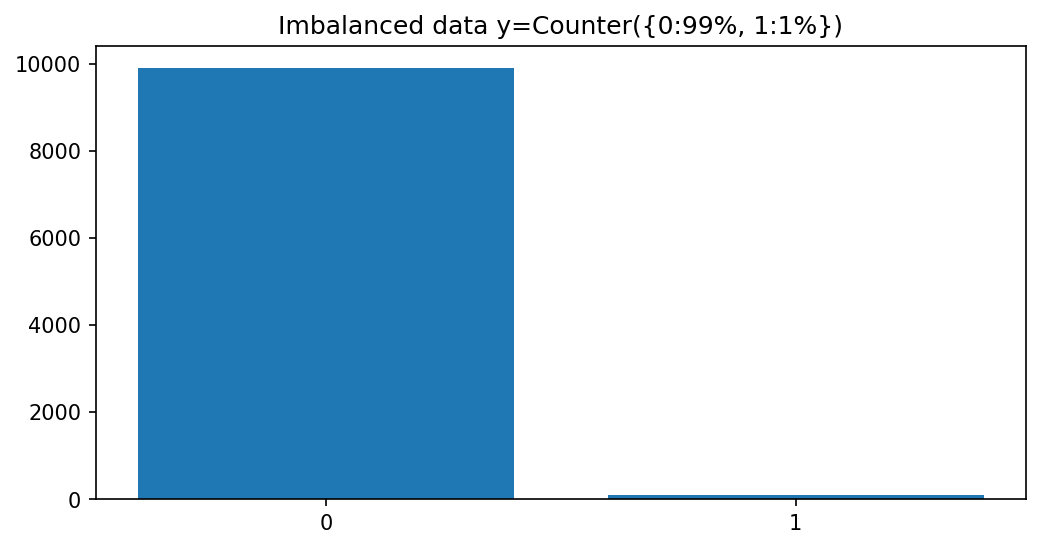

In [28]:
plt.figure(figsize=(8, 4), dpi=150)
plt.bar([0, 1], df.y.value_counts())

plt.title('Imbalanced data y=Counter({0:99%, 1:1%})')
plt.xticks([0, 1], ('0', '1'))

plt.show();

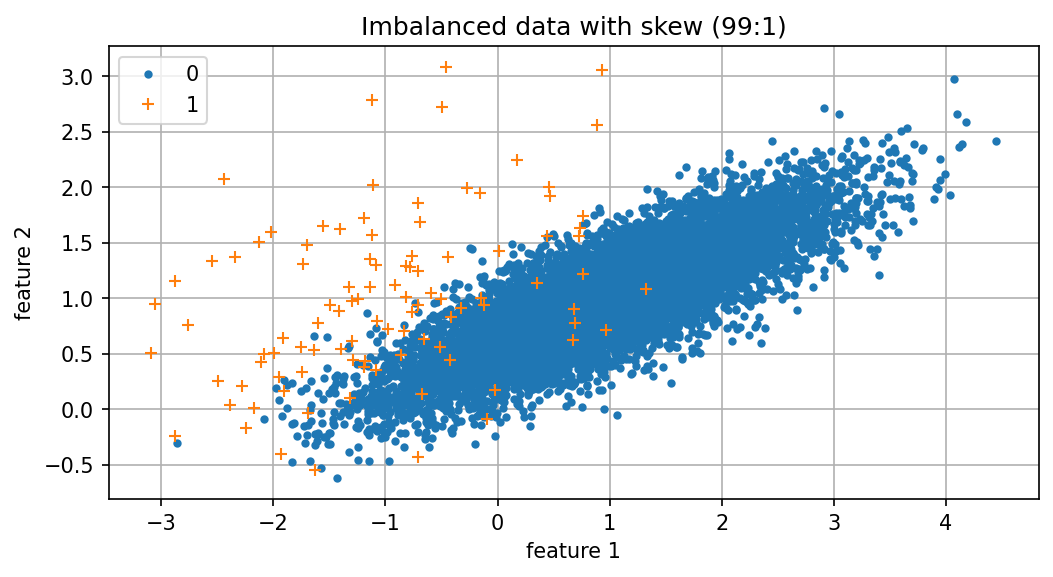

In [29]:
# scetter plot ...
plt.figure(figsize=(8, 4), dpi=150)
plt.plot(X[idx0, 0], X[idx0, 1], '.', label='0')
plt.plot(X[idx1, 0], X[idx1, 1], '+', label='1')

plt.title('Imbalanced data with skew (99:1)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid()
plt.show();

## Oversampling

Generate new samples in the classes which are under-represented (Majority), the most naive strategy is to generate new samples randomly.

1. Duplicating examples in the minority class.
2. Naive random over-sampling.
3. Synthetic Minority Oversampling Technique (SMOTE) 
4. Adaptive Synthetic (ADASYN)
5. ...

>  ADASYN focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier [[3.4.]](#resources)

> SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b. [[3.4.]](#resources) [[3.5]](#resources)

## Undersampling

Remove samples in the classes which are over-represented (Majority), the most naive strategy is randomly removing.

1. Near Miss Undersampling.
2. Condensed Nearest Neighbor Rule Undersampling.
3. ...


> NearMiss-1 selects the positive samples for which the average distance to the N closest samples of the negative class is the smallest. [[3.4.]](#resources)

<figure>
    <!-- <figcaption>img. src [4.3.]</figcaption> -->
    <img src="./images/NearMiss-1.png"/>
</figure>



> NearMiss-2 selects the positive samples for which the average distance to the N farthest samples of the negative class is the smallest. [[3.4.]](#resources)

<figure>
    <!-- <figcaption>img. src [4.3.]</figcaption> -->
    <img src="./images/NearMiss-2.png"/>
</figure>

> NearMiss-3 is a 2-steps algorithm. First, for each negative sample, their M nearest-neighbors will be kept. Then, the positive samples selected are the one for which the average distance to the N nearest-neighbors is the largest. [[3.4.]](#resources)


<figure>
    <!-- <figcaption>img. src [4.3.]</figcaption> -->
    <img src="./images/NearMiss-3.png"/>
</figure>

## Combine Oversampling and Undersampling

> TODO ...

## In practice
<a id="in-practice"></a>

In [9]:
def split_data(X_, y_):
    return train_test_split(X_, y_, test_size=0.33, random_state=42)

def get_index(ytrain, ytest):
    idx_train_imb0 = np.where(ytrain == 0)[0]
    idx_train_imb1 = np.where(ytrain == 1)[0]

    idx_test_imb0 = np.where(ytest == 0)[0]
    idx_test_imb1 = np.where(ytest == 1)[0]

    print('Train set = {}, class_0 = {}, class_1 = {}'.format(
        len(ytrain),
        len(ytrain[idx_train_imb0]),
        len(ytrain[idx_train_imb1])
    ))

    print('Test set = {}, class_0 = {}, class_1 = {}'.format(
        len(ytest),
        len(ytest[idx_test_imb0]),
        len(ytest[idx_test_imb1])
    ))

    return idx_train_imb0, idx_train_imb1, idx_test_imb0, idx_test_imb1

def plot_dataset(xtrain, xtest, ytrain, ytest, title='Dataset'):
    # ...
    idx_train_imb0, idx_train_imb1, idx_test_imb0, idx_test_imb1 = get_index(ytrain, ytest)
    # scetter plot ...
    plt.figure(figsize=(8, 4), dpi=150)
    plt.plot(xtrain[idx_train_imb0, 0], xtrain[idx_train_imb0, 1], '.', label='0')
    plt.plot(xtrain[idx_train_imb1, 0], xtrain[idx_train_imb1, 1], '+', label='1')
    plt.plot(xtest[idx_test_imb0, 0], xtest[idx_test_imb0, 1], 'o', label='00')
    plt.plot(xtest[idx_test_imb1, 0], xtest[idx_test_imb1, 1], '*', label='11')

    plt.title(title)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend()
    plt.grid()
    plt.show();


def fit_pipes(data, clf):
    # ...
    rfc_pipe, lr_pipe, knc_pipe = clf
    xtrain, xtest, ytrain, ytest = data
    # Fit ...
    rfc_pipe.fit(x_train_imb, y_train_imb)
    lr_pipe.fit(x_train_imb, y_train_imb)
    knc_pipe.fit(x_train_imb, y_train_imb)

    acc = {
        'classifier': [],
        'train_acc': [],
        'test_acc': [],
        'precision_train': [],
        'recall_train': [],
        'precision_test': [],
        'recall_test': [],
        'f1_train': [],
        'f1_test': [],
    }

    for name, clf in zip(
        ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier'],
        [rfc_pipe, lr_pipe, knc_pipe]):
        acc['classifier'].append(name)
        acc['train_acc'].append(round(clf.score(xtrain, ytrain), 3))
        acc['test_acc'].append(round(clf.score(xtest, ytest), 3))

        acc['precision_train'].append(round(precision_score(ytrain, clf.predict(xtrain)), 3))
        acc['recall_train'].append(round(recall_score(ytrain, clf.predict(xtrain)), 3))
        acc['f1_train'].append(round(f1_score(ytrain, clf.predict(xtrain)), 3))

        acc['precision_test'].append(round(precision_score(ytest, clf.predict(xtest)), 3))
        acc['recall_test'].append(round(recall_score(ytest, clf.predict(xtest)) ,3))
        acc['f1_test'].append(round(f1_score(ytest, clf.predict(xtest)) ,3))

    return pd.DataFrame(acc)

### Imbalanced dataset

In [10]:
df.describe()

,f1,f2,y
count,10000.000000,10000.000000,10000.000000
mean,0.966733,0.997252,0.010000
std,0.950270,0.467640,0.099504
min,-3.091974,-0.622193,0.000000
25%,0.335374,0.686097,0.000000
50%,0.965995,0.998290,0.000000
75%,1.605024,1.307164,0.000000
max,4.447943,3.087821,1.000000


Train set = 6700, class_0 = 6632, class_1 = 68
Test set = 3300, class_0 = 3268, class_1 = 32


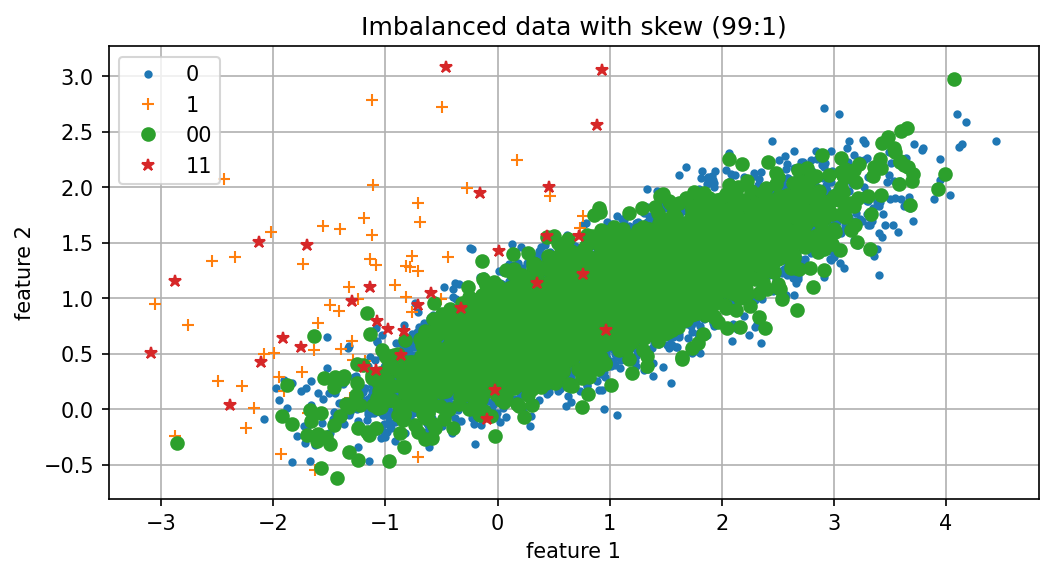

In [37]:
x_train_imb, x_test_imb, y_train_imb, y_test_imb = split_data(X, y)

plot_dataset(x_train_imb, x_test_imb, y_train_imb, y_test_imb, 'Imbalanced data with skew (99:1)')

In [39]:
processing_pipline = Pipeline([
    ('standardScaler', StandardScaler()),
])

processing_pipline.fit(x_train_imb, x_test_imb)

Pipeline(steps=[('standardScaler', StandardScaler())])

In [12]:
# Models ...

RandomForestClassifier_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])


LogisticRegression_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression())
])


KNeighborsClassifier_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('KNeighborsClassifier', KNeighborsClassifier())
])

In [13]:
fit_pipes(
    (x_train_imb, x_test_imb, y_train_imb, y_test_imb),
    (RandomForestClassifier_pipe, LogisticRegression_pipe, KNeighborsClassifier_pipe)
)

,classifier,train_acc,test_acc,precision_train,recall_train,precision_test,recall_test,f1_train,f1_test
0,RandomForestClassifier,1.000,0.993,1.000,1.000,0.700,0.438,1.000,0.538
1,LogisticRegression,0.995,0.993,0.927,0.559,0.812,0.406,0.697,0.542
2,KNeighborsClassifier,0.995,0.993,0.929,0.574,0.812,0.406,0.709,0.542


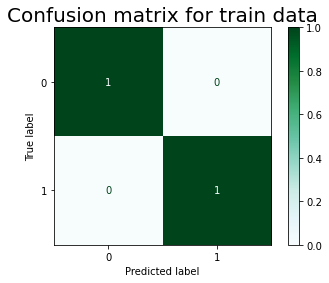

In [35]:
# V1. ...
# y_train_imb_pred = RandomForestClassifier_pipe.predict(x_train_imb)
# print('Confusion matrix for train data')
# confusion_matrix(y_train_imb, y_train_imb_pred)

# V2. ...
plot_confusion_matrix(RandomForestClassifier_pipe, x_train_imb, y_train_imb, cmap="BuGn", normalize='true')
plt.title('Confusion matrix for train data', fontsize='20')
plt.show();

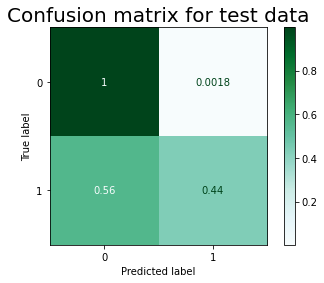

In [36]:
# V1. ...
# y_test_imb_pred = RandomForestClassifier_pipe.predict(x_test_imb)
# print('Confusion matrix for test data')
# confusion_matrix(y_test_imb, y_test_imb_pred)

# V2. ...
plot_confusion_matrix(RandomForestClassifier_pipe, x_test_imb, y_test_imb, cmap="BuGn", normalize='true')
plt.title('Confusion matrix for test data', fontsize='20')
plt.show();

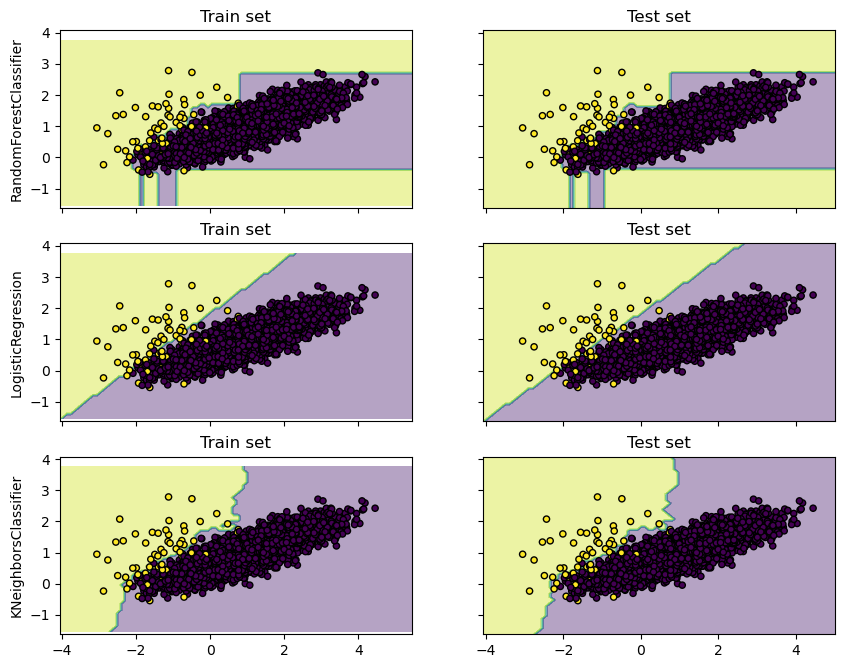

In [37]:
# Plotting decision regions
f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8), dpi=100)

for i, clf, clf_title in zip(
    [0,1,2],
    [RandomForestClassifier_pipe, LogisticRegression_pipe, KNeighborsClassifier_pipe],
    ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier'],
    ):
    axarr[i, 0].set(ylabel=clf_title)
    for j, X_, title in zip(
        [0, 1],
        [x_train_imb, x_test_imb],
        ['Train set', 'Test set']):
        # ...
        x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
        y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        # ...
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[i, j].contourf(xx, yy, Z, alpha=0.4)
        axarr[i, j].scatter(x_train_imb[:, 0], x_train_imb[:, 1], c=y_train_imb, s=20, edgecolor='k')
        axarr[i, j].set_title(title)


plt.show();

### Balanced dataset (Near Miss Undersampling) 

In [19]:
under_nearmiss_1 = imblearn.under_sampling.NearMiss(version=1)
# under_nearmiss_2 = imblearn.under_sampling.NearMiss(version=2)
# under_nearmiss_3 = imblearn.under_sampling.NearMiss(version=3)

Train set = 134, class_0 = 65, class_1 = 69
Test set = 66, class_0 = 35, class_1 = 31


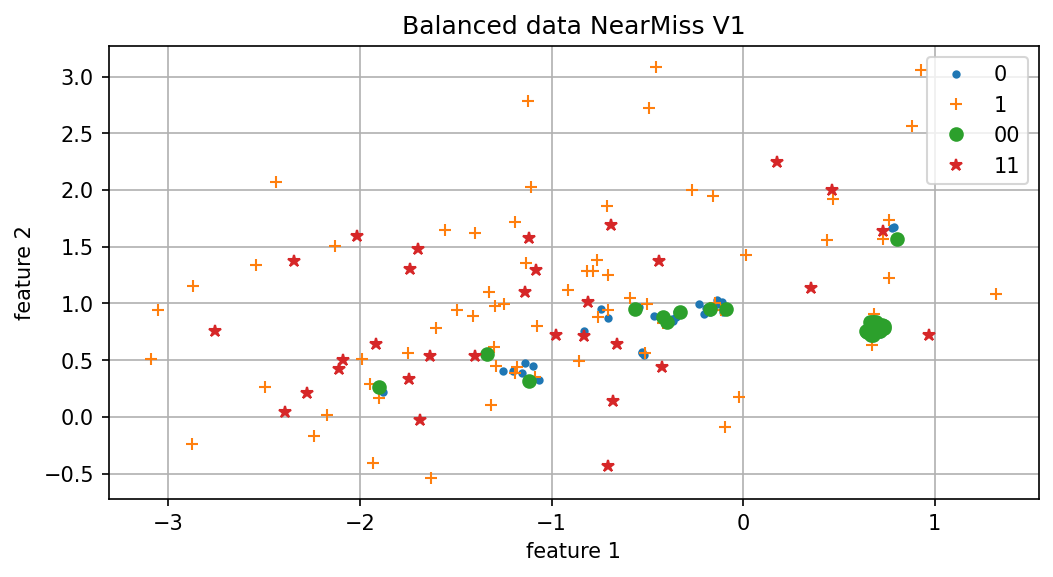

In [20]:
X_under_nearmiss_1, y_under_nearmiss_1 = under_nearmiss_1.fit_resample(X.copy(), y.copy())

(x_train_und_nearmiss_1,
 x_test_und_nearmiss_1,
 y_train_und_nearmiss_1,
 y_test_und_nearmiss_1) = split_data(X_under_nearmiss_1, y_under_nearmiss_1)

plot_dataset(
    x_train_und_nearmiss_1,
    x_test_und_nearmiss_1,
    y_train_und_nearmiss_1,
    y_test_und_nearmiss_1,
    'Balanced data NearMiss V1')

In [21]:
# Models ...
RandomForestClassifier_nearmiss_1_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])


LogisticRegression_nearmiss_1_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression())
])


KNeighborsClassifier_nearmiss_1_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('KNeighborsClassifier', KNeighborsClassifier())
])

In [22]:
fit_pipes(
    (x_train_und_nearmiss_1,
     x_test_und_nearmiss_1,
     y_train_und_nearmiss_1,
     y_test_und_nearmiss_1),
    (RandomForestClassifier_nearmiss_1_pipe, LogisticRegression_nearmiss_1_pipe, KNeighborsClassifier_nearmiss_1_pipe)
)

,classifier,train_acc,test_acc,precision_train,recall_train,precision_test,recall_test,f1_train,f1_test
0,RandomForestClassifier,0.896,0.939,1.000,0.797,1.000,0.871,0.887,0.931
1,LogisticRegression,0.746,0.758,1.000,0.507,0.941,0.516,0.673,0.667
2,KNeighborsClassifier,0.724,0.803,0.971,0.478,0.950,0.613,0.641,0.745


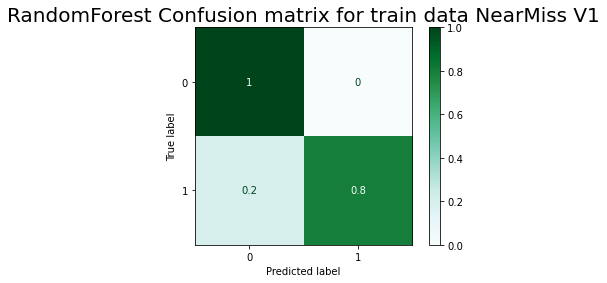

In [42]:
plot_confusion_matrix(RandomForestClassifier_nearmiss_1_pipe, x_train_und_nearmiss_1, y_train_und_nearmiss_1, cmap="BuGn", normalize='true')
plt.title('RandomForest Confusion matrix for train data NearMiss V1', fontsize='20')
plt.show();

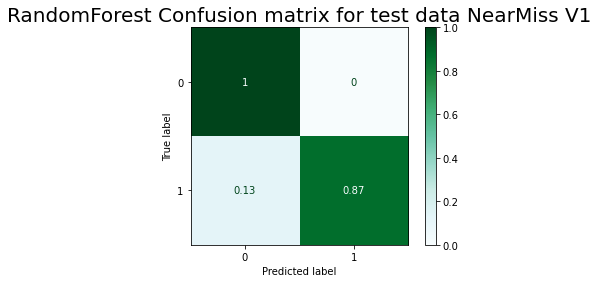

In [43]:
plot_confusion_matrix(RandomForestClassifier_nearmiss_1_pipe, x_test_und_nearmiss_1, y_test_und_nearmiss_1, cmap="BuGn", normalize='true')
plt.title('RandomForest Confusion matrix for test data NearMiss V1', fontsize='20')
plt.show();

### Balanced dataset (Near Miss Undersampling) 

Train set = 13266, class_0 = 6609, class_1 = 6657
Test set = 6534, class_0 = 3291, class_1 = 3243


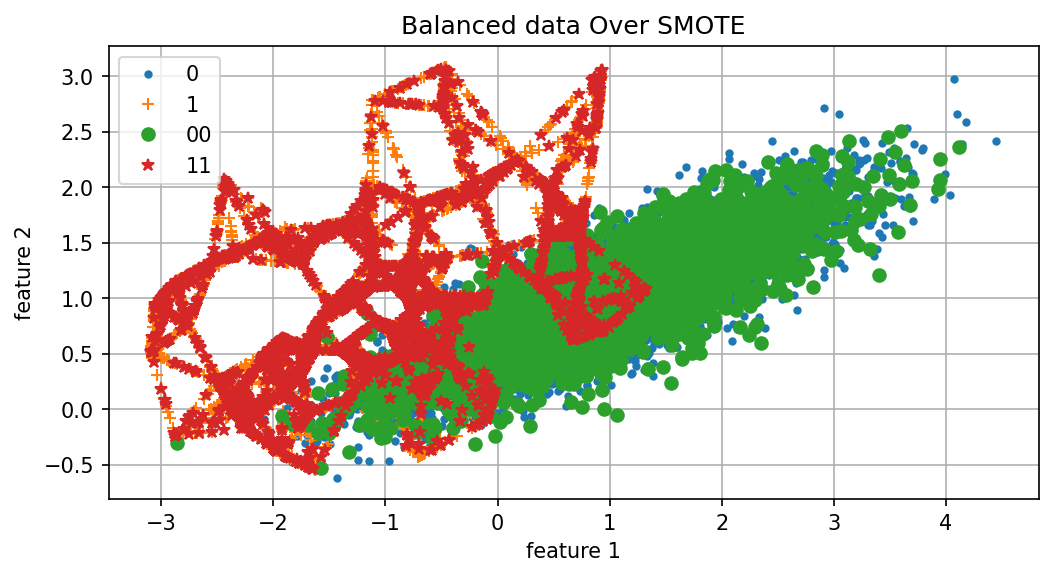

In [16]:
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE()
X_over_smote, y_over_smote = smote.fit_resample(X.copy(), y.copy())

(x_train_over_smote,
 x_test_over_smote,
 y_train_over_smote,
 y_test_over_smote) = split_data(X_over_smote, y_over_smote)

plot_dataset(
    x_train_over_smote,
    x_test_over_smote,
    y_train_over_smote,
    y_test_over_smote,
    'Balanced data Over SMOTE')

In [15]:
# Models ...
RandomForestClassifier_smote_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])


LogisticRegression_smote_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression())
])


KNeighborsClassifier_smote_pipe = Pipeline([
    ('standardScaler', StandardScaler()),
    ('KNeighborsClassifier', KNeighborsClassifier())
])

In [17]:
fit_pipes(
    (x_train_over_smote,
     x_test_over_smote,
     y_train_over_smote,
     y_test_over_smote),
    (RandomForestClassifier_smote_pipe, LogisticRegression_smote_pipe, KNeighborsClassifier_smote_pipe)
)

,classifier,train_acc,test_acc,precision_train,recall_train,precision_test,recall_test,f1_train,f1_test
0,RandomForestClassifier,0.810,0.812,1.000,0.621,0.999,0.621,0.766,0.766
1,LogisticRegression,0.755,0.753,0.999,0.511,0.998,0.504,0.677,0.669
2,KNeighborsClassifier,0.763,0.763,1.000,0.527,0.997,0.524,0.690,0.687


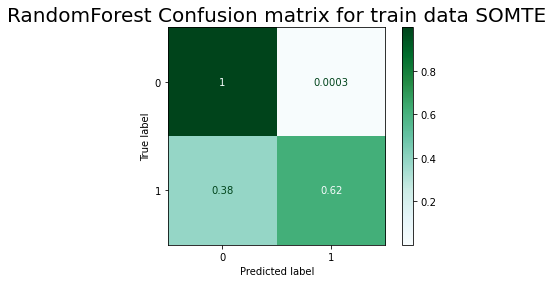

In [47]:
plot_confusion_matrix(RandomForestClassifier_smote_pipe, x_train_over_smote, y_train_over_smote, cmap="BuGn",normalize='true')
plt.title('RandomForest Confusion matrix for train data SOMTE', fontsize='20')
plt.show();

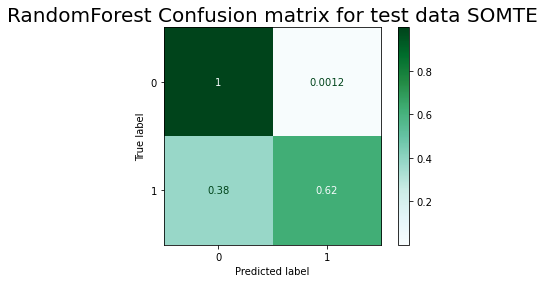

In [48]:
plot_confusion_matrix(RandomForestClassifier_smote_pipe, x_test_over_smote, y_test_over_smote, cmap="BuGn", normalize='true')
plt.title('RandomForest Confusion matrix for test data SOMTE', fontsize='20')
plt.show();

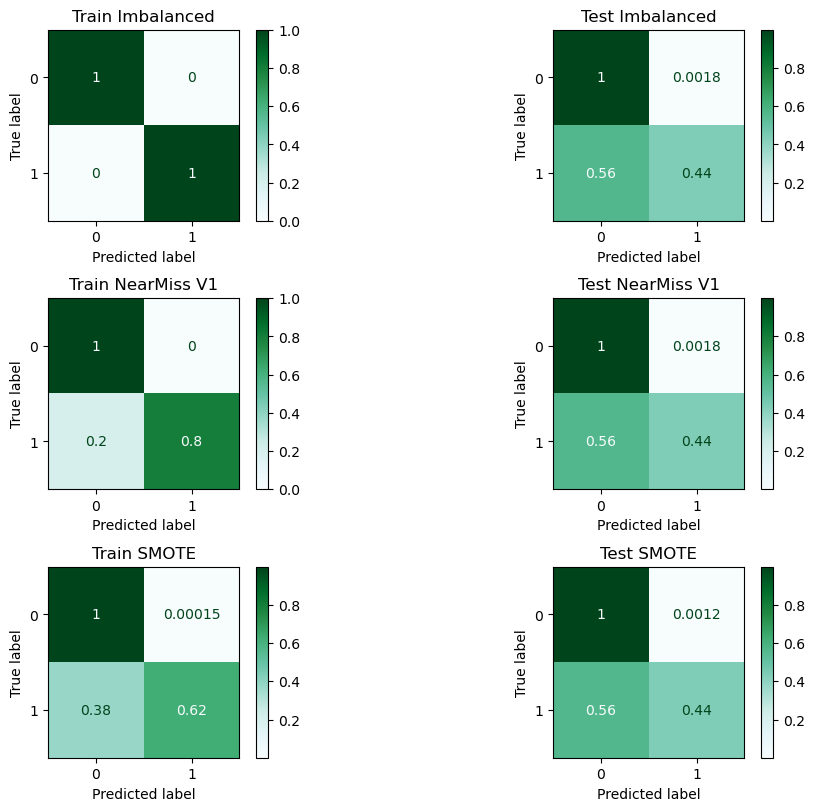

In [23]:
import matplotlib.gridspec as gridspec

# x_train_imb, x_test_imb, y_train_imb, y_test_imb

fig = plt.figure(figsize=(10,8), constrained_layout=True, dpi=100)
spec = gridspec.GridSpec(nrows=3, ncols=2, figure=fig)

# Imbalanced ...
# ...
ax1 = fig.add_subplot(spec[0, 0])
ax1.set_title('Train Imbalanced')
plot_confusion_matrix(RandomForestClassifier_nearmiss_1_pipe, x_train_imb, y_train_imb, 
                      cmap="BuGn",
                      normalize='true',
                      ax=ax1)

# ...
ax2 = fig.add_subplot(spec[0, 1])
ax2.set_title('Test Imbalanced')
plot_confusion_matrix(RandomForestClassifier_nearmiss_1_pipe, x_test_imb, y_test_imb,
                      cmap="BuGn",
                      normalize='true',
                      ax=ax2)


# NearMiss V1 ...
# ...
ax3 = fig.add_subplot(spec[1, 0])
ax3.set_title('Train NearMiss V1')
plot_confusion_matrix(RandomForestClassifier_nearmiss_1_pipe, x_train_und_nearmiss_1, y_train_und_nearmiss_1, 
                      cmap="BuGn",
                      normalize='true',
                      ax=ax3)

# ...
ax4 = fig.add_subplot(spec[1, 1])
ax4.set_title('Test NearMiss V1')
plot_confusion_matrix(RandomForestClassifier_nearmiss_1_pipe, x_test_imb, y_test_imb,
                      cmap="BuGn",
                      normalize='true',
                      ax=ax4)

# SMOTE ...
# ...
ax5 = fig.add_subplot(spec[2, 0])
ax5.set_title('Train SMOTE')
plot_confusion_matrix(RandomForestClassifier_smote_pipe, x_train_over_smote, y_train_over_smote, 
                      cmap="BuGn",
                      normalize='true',
                      ax=ax5)

# ...
ax6 = fig.add_subplot(spec[2, 1])
ax6.set_title('Test SMOTE')
plot_confusion_matrix(RandomForestClassifier_smote_pipe, x_test_imb, y_test_imb,
                      cmap="BuGn",
                      normalize='true',
                      ax=ax6)


# ...
plt.show();

In [25]:
fit_pipes(
    (x_train_imb, x_test_imb, y_train_imb, y_test_imb),
    (RandomForestClassifier_pipe, LogisticRegression_pipe, KNeighborsClassifier_pipe)
)

,classifier,train_acc,test_acc,precision_train,recall_train,precision_test,recall_test,f1_train,f1_test
0,RandomForestClassifier,1.000,0.993,1.000,1.000,0.737,0.438,1.000,0.549
1,LogisticRegression,0.995,0.993,0.927,0.559,0.812,0.406,0.697,0.542
2,KNeighborsClassifier,0.995,0.993,0.929,0.574,0.812,0.406,0.709,0.542


In [27]:
fit_pipes(
    (x_train_und_nearmiss_1,
     x_test_imb,
     y_train_und_nearmiss_1,
     y_test_imb),
    (RandomForestClassifier_nearmiss_1_pipe, LogisticRegression_nearmiss_1_pipe, KNeighborsClassifier_nearmiss_1_pipe)
)

,classifier,train_acc,test_acc,precision_train,recall_train,precision_test,recall_test,f1_train,f1_test
0,RandomForestClassifier,0.896,0.993,1.000,0.797,0.737,0.438,0.887,0.549
1,LogisticRegression,0.746,0.993,1.000,0.507,0.812,0.406,0.673,0.542
2,KNeighborsClassifier,0.724,0.993,0.971,0.478,0.812,0.406,0.641,0.542


In [29]:
fit_pipes(
    (x_train_over_smote,
     x_test_imb,
     y_train_over_smote,
     y_test_imb),
    (RandomForestClassifier_smote_pipe, LogisticRegression_smote_pipe, KNeighborsClassifier_smote_pipe)
)

,classifier,train_acc,test_acc,precision_train,recall_train,precision_test,recall_test,f1_train,f1_test
0,RandomForestClassifier,0.801,0.992,0.999,0.603,0.667,0.438,0.752,0.528
1,LogisticRegression,0.755,0.993,0.999,0.511,0.812,0.406,0.677,0.542
2,KNeighborsClassifier,0.763,0.993,1.000,0.527,0.812,0.406,0.690,0.542


In [40]:
y_test_imb_pred = RandomForestClassifier_pipe.predict(x_test_imb)
pd.crosstab(y_test_imb, y_test_imb_pred, normalize="index")

col_0,0,1
row_0,,
0,0.99847,0.00153
1,0.56250,0.43750


In [35]:
y_test_nearmiss_1_pred = RandomForestClassifier_nearmiss_1_pipe.predict(x_test_imb)
pd.crosstab(y_test_imb, y_test_nearmiss_1_pred, normalize="index")

col_0,0,1
row_0,,
0,0.99847,0.00153
1,0.56250,0.43750


In [41]:
y_test_smote_pred = RandomForestClassifier_smote_pipe.predict(x_test_imb)
pd.crosstab(y_test_imb, y_test_smote_pred, normalize="index")

col_0,0,1
row_0,,
0,0.997858,0.002142
1,0.562500,0.437500


In [ ]:
processing_pipline.transform() ## TODO .....

## Summary
<a id="summary"></a>


1. The balancing issue corresponds to the difference of the number of samples in the different classes.
2. Over/Under
3. ...

## What Next ?
<a id="what-next"></a>

1. Library
> [Imbalanced learn](https://imbalanced-learn.readthedocs.io/en/stable/index.html)
2. Book
> [Foundations, Algorithms, and Applications, 2013.](https://www.amazon.com/dp/1118074629/)

## Resources
<a id="resources"></a>

### Books
1. [[1.1.] Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.](https://www.amazon.com/dp/1118074629/)

### Papers

### Web
1. [[3.1.] Wiki, Oversampling and undersampling in data analysis](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)
2. [[3.2.] Introduction](https://imbalanced-learn.readthedocs.io/en/stable/introduction.html)
3. [[3.3.] Using Under-Sampling Techniques for Extremely Imbalanced Data](https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8)
4. [[3.4.] Controlled under-sampling techniques > Mathematical formulation](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html#id2)
5 [[3.5] smote-oversampling-for-imbalanced-classification](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

### Images
1. [[4.1.] dealing with imbalanced data](https://medium.com/@SeoJaeDuk/archived-post-dealing-with-imbalanced-data-577f024c8681)
2. [[4.2.] Problem statement regarding imbalanced data sets](https://imbalanced-learn.readthedocs.io/en/stable/introduction.html)

# TODO

https://www.google.com/search?q=under-sampling&oq=under-sam&aqs=chrome.1.69i57j0l6j69i60.4745j0j7&sourceid=chrome&ie=UTF-8


https://www.google.com/search?q=oversampling+undersampling&hl=pl&sxsrf=ALeKk031-jdzqaKJnxHf2CmIMMtd73RRzQ:1594037502718&source=lnms&sa=X&ved=0ahUKEwi1re64zLjqAhVDxosKHRtpD1UQ_AUICSgA&biw=1536&bih=722&dpr=1.25


https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8

https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/



https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

https://medium.com/quantyca/oversampling-and-undersampling-adasyn-vs-enn-60828a58db39